In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from mpl_toolkits import mplot3d

In [2]:
data = sns.load_dataset('iris')
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


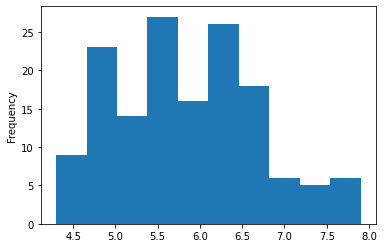

In [4]:
data.sepal_length.plot.hist();

In [5]:
sns.set()

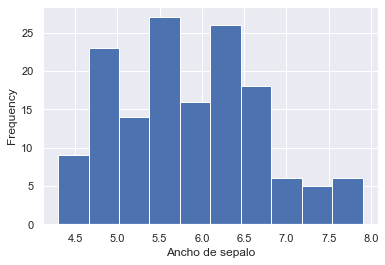

In [6]:
data.sepal_length.plot.hist()
plt.xlabel('Ancho de sepalo');

In [7]:
data.groupby('species')['sepal_length'].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
setosa,50.0,5.006,0.352490,4.3,4.800,5.0,5.2,5.8
versicolor,50.0,5.936,0.516171,4.9,5.600,5.9,6.3,7.0
virginica,50.0,6.588,0.635880,4.9,6.225,6.5,6.9,7.9


# Estandarizacion de datos

In [8]:
scaler = StandardScaler()
col_a_escalar = ['sepal_length', 'petal_length', 'petal_width']
datos_a_escalar = data.copy()
datos_a_escalar[col_a_escalar] = scaler.fit_transform(data[col_a_escalar])

In [9]:
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [10]:
datos_a_escalar.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.900681,3.5,-1.340227,-1.315444,setosa
1,-1.143017,3.0,-1.340227,-1.315444,setosa
2,-1.385353,3.2,-1.397064,-1.315444,setosa
3,-1.506521,3.1,-1.283389,-1.315444,setosa
4,-1.021849,3.6,-1.340227,-1.315444,setosa
5,-0.537178,3.9,-1.169714,-1.052180,setosa
6,-1.506521,3.4,-1.340227,-1.183812,setosa
7,-1.021849,3.4,-1.283389,-1.315444,setosa
8,-1.748856,2.9,-1.340227,-1.315444,setosa
9,-1.143017,3.1,-1.283389,-1.447076,setosa


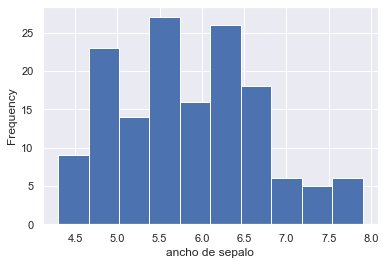

In [11]:
data.sepal_length.plot.hist()
plt.xlabel('ancho de sepalo');

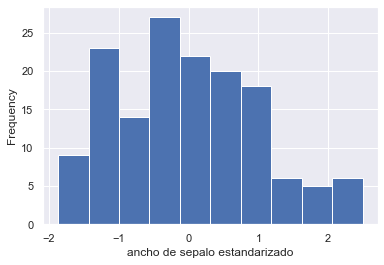

In [12]:
datos_a_escalar.sepal_length.plot.hist()
plt.xlabel('ancho de sepalo estandarizado');

In [13]:
cluster_cols = ['sepal_length', 'petal_length','petal_width']
datos_a_escalar[cluster_cols].head()

,sepal_length,petal_length,petal_width
0,-0.900681,-1.340227,-1.315444
1,-1.143017,-1.340227,-1.315444
2,-1.385353,-1.397064,-1.315444
3,-1.506521,-1.283389,-1.315444
4,-1.021849,-1.340227,-1.315444


# Datos_a_escalar.plot.scatter(x='sepal_length', y='petal_length');

In [14]:
modelo2 = KMeans(n_clusters=3, random_state=42)
modelo2.fit(datos_a_escalar[cluster_cols])

KMeans(n_clusters=3, random_state=42)

In [15]:
datos_a_escalar['Cluster2']= modelo2.predict(datos_a_escalar[cluster_cols])

In [16]:
datos_a_escalar

,sepal_length,sepal_width,petal_length,petal_width,species,Cluster2
0,-0.900681,3.5,-1.340227,-1.315444,setosa,1
1,-1.143017,3.0,-1.340227,-1.315444,setosa,1
2,-1.385353,3.2,-1.397064,-1.315444,setosa,1
3,-1.506521,3.1,-1.283389,-1.315444,setosa,1
4,-1.021849,3.6,-1.340227,-1.315444,setosa,1
...,...,...,...,...,...,...
145,1.038005,3.0,0.819596,1.448832,virginica,0
146,0.553333,2.5,0.705921,0.922303,virginica,0
147,0.795669,3.0,0.819596,1.053935,virginica,0
148,0.432165,3.4,0.933271,1.448832,virginica,0


In [17]:
from sklearn import decomposition

In [18]:
pca=decomposition.PCA(n_components=2)
pca_res = pca.fit_transform(datos_a_escalar[cluster_cols])

In [19]:
pca_res

array([[-2.06036006e+00, -2.98674403e-01],
       [-2.19598120e+00, -1.01727066e-01],
       [-2.36522102e+00,  8.07491332e-02],
       [-2.36579421e+00,  2.08165079e-01],
       [-2.12817063e+00, -2.00200734e-01],
       [-1.60325585e+00, -4.12703496e-01],
       [-2.32300467e+00,  2.62683189e-01],
       [-2.09455194e+00, -1.85729596e-01],
       [-2.53503403e+00,  3.90641278e-01],
       [-2.23877073e+00, -1.56245176e-01],
       [-1.82330967e+00, -5.79624270e-01],
       [-2.19655439e+00,  2.56888802e-02],
       [-2.34019999e+00, -7.22426457e-02],
       [-2.78010889e+00,  3.76712282e-01],
       [-1.65292347e+00, -1.01693236e+00],
       [-1.46706152e+00, -7.37066779e-01],
       [-1.73773060e+00, -4.70588050e-01],
       [-1.98395184e+00, -2.29685154e-01],
       [-1.47623237e+00, -7.77113751e-01],
       [-1.95033315e+00, -2.15214016e-01],
       [-1.75607230e+00, -5.50681993e-01],
       [-1.87392492e+00, -1.46224767e-01],
       [-2.53388765e+00,  1.35809386e-01],
       [-1.

In [20]:
datos_a_escalar['pc1'] = pca_res[:,0]
datos_a_escalar['pc2'] = pca_res[:,1]

In [21]:
datos_a_escalar

,sepal_length,sepal_width,petal_length,petal_width,species,Cluster2,pc1,pc2
0,-0.900681,3.5,-1.340227,-1.315444,setosa,1,-2.060360,-0.298674
1,-1.143017,3.0,-1.340227,-1.315444,setosa,1,-2.195981,-0.101727
2,-1.385353,3.2,-1.397064,-1.315444,setosa,1,-2.365221,0.080749
3,-1.506521,3.1,-1.283389,-1.315444,setosa,1,-2.365794,0.208165
4,-1.021849,3.6,-1.340227,-1.315444,setosa,1,-2.128171,-0.200201
...,...,...,...,...,...,...,...,...
145,1.038005,3.0,0.819596,1.448832,virginica,0,1.906692,0.124424
146,0.553333,2.5,0.705921,0.922303,virginica,0,1.262579,0.213420
147,0.795669,3.0,0.819596,1.053935,virginica,0,1.541846,0.114404
148,0.432165,3.4,0.933271,1.448832,virginica,0,1.634876,0.645735


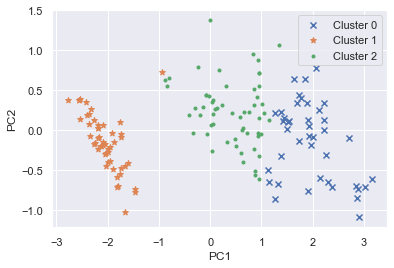

In [22]:
marcador = ['x', '*', '.', '|', '_']
for segmento in range(3):
    temp = datos_a_escalar[datos_a_escalar.Cluster2 == segmento]
    plt.scatter(temp.pc1, temp.pc2, marker = marcador[segmento], label = 'Cluster '+ str(segmento))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend();

In [23]:
data['Segmento IA'] = datos_a_escalar.Cluster2

In [24]:
data

,sepal_length,sepal_width,petal_length,petal_width,species,Segmento IA
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0
146,6.3,2.5,5.0,1.9,virginica,0
147,6.5,3.0,5.2,2.0,virginica,0
148,6.2,3.4,5.4,2.3,virginica,0


In [25]:
data.groupby('Segmento IA')[col_a_escalar].mean()

,sepal_length,petal_length,petal_width
Segmento IA,,,
0,6.853659,5.653659,2.036585
1,5.003922,1.498039,0.260784
2,5.867241,4.405172,1.432759


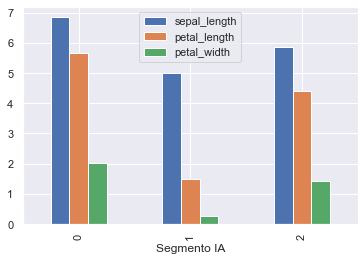

In [26]:
data.groupby('Segmento IA')[col_a_escalar].mean().plot.bar();

In [27]:
col_segmento = ['sepal_length', 'petal_length']
X = datos_a_escalar[col_segmento]

In [28]:
puntuacionInercia = []
for k in range(2, 11):
    inercia = KMeans(n_clusters=k, random_state=42).fit(X).inertia_
    puntuacionInercia.append(inercia)
puntuacionInercia

[84.72073862193368,
 43.034691996034674,
 28.50821835607059,
 22.39598608015194,
 16.847199290462854,
 13.897240531466139,
 11.800764286157012,
 9.82991329020655,
 8.234724576099529]

In [29]:
tipos = data[['sepal_length', 'petal_length', 'petal_width']].copy()

# Crear modelo

In [30]:
km = KMeans(n_clusters=3, n_init=100, max_iter=1000, init='random')

In [31]:
prediccionkm = km.fit_predict(tipos)

In [32]:
silhouette_score(tipos, prediccionkm)

0.5848326611096278

In [33]:
calinski_harabasz_score(tipos, prediccionkm)

684.292455197042

In [34]:
%matplotlib notebook

<IPython.core.display.Javascript object>


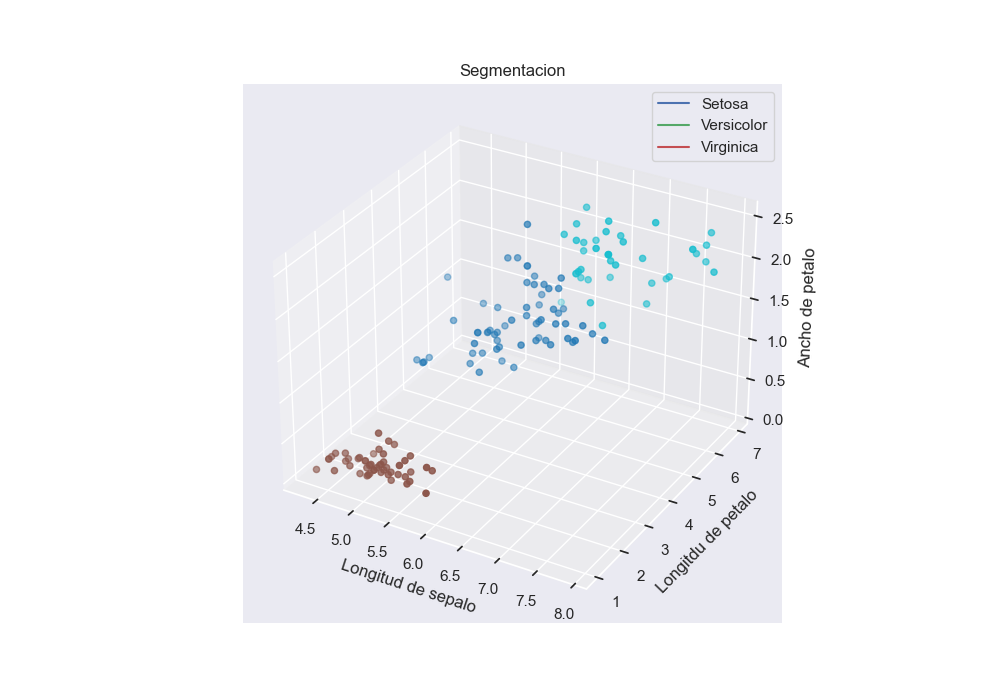

In [35]:
fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')
ax.scatter3D(tipos['sepal_length'], tipos['petal_length'], tipos['petal_width'], c=prediccionkm, cmap='tab10')
plt.title('Segmentacion')
ax.set_xlabel('Longitud de sepalo')
ax.set_ylabel('Longitdu de petalo')
ax.set_zlabel('Ancho de petalo')
# Añadir una leyenda a los stack plots es complicado.
plt.plot([], [], color='b', label = 'Setosa')
plt.plot([], [], color='g', label = 'Versicolor')
plt.plot([], [], color='r', label = 'Virginica')

plt.show()
plt.legend();

In [36]:
data.groupby('species')['sepal_length'].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
setosa,50.0,5.006,0.352490,4.3,4.800,5.0,5.2,5.8
versicolor,50.0,5.936,0.516171,4.9,5.600,5.9,6.3,7.0
virginica,50.0,6.588,0.635880,4.9,6.225,6.5,6.9,7.9
